<a href="https://colab.research.google.com/github/AndrewDavidRatnam/Transformers-and-Generative-Models-For-Visual-Tasks-Workshop/blob/main/Transformers_and_Gen_AI_for_Vision_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1

## References and Pre-requistes Walk Through

### Numpy and Python

### Pytorch and autograd

### Pytorch for computer vision

Dependencies

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
print(torch.__version__, torchvision.__version__)

2.6.0+cu124 0.21.0+cu124


#### 1. Getting a dataset
we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [ ]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 119MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.79MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 61.6MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.06MB/s]


In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

##### 1.1 Input and Output Shapes of a Computer Vision Model

In [ ]:
image.shape #colour_channel,height, width

torch.Size([1, 28, 28])

PyTorch generally accepts `NCHW` (channels first) as the default for many operators.

However, PyTorch also explains that `NHWC` (channels last) performs better and is [considered best practice](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice).

In [ ]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

10 different classes, it means our problem is **multi-class classification**.


Image shape: torch.Size([1, 28, 28]), image.squeeze() shape: torch.Size([28, 28])


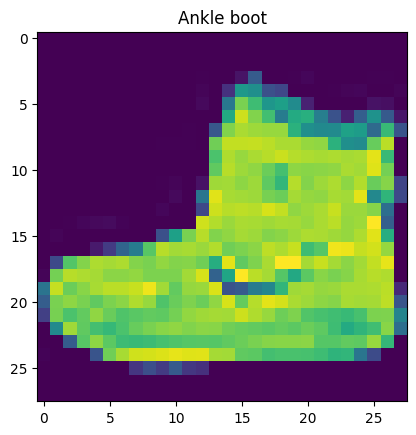

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}, image.squeeze() shape: {image.squeeze().shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label]);

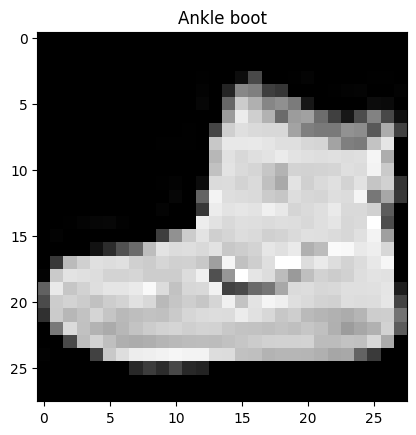

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

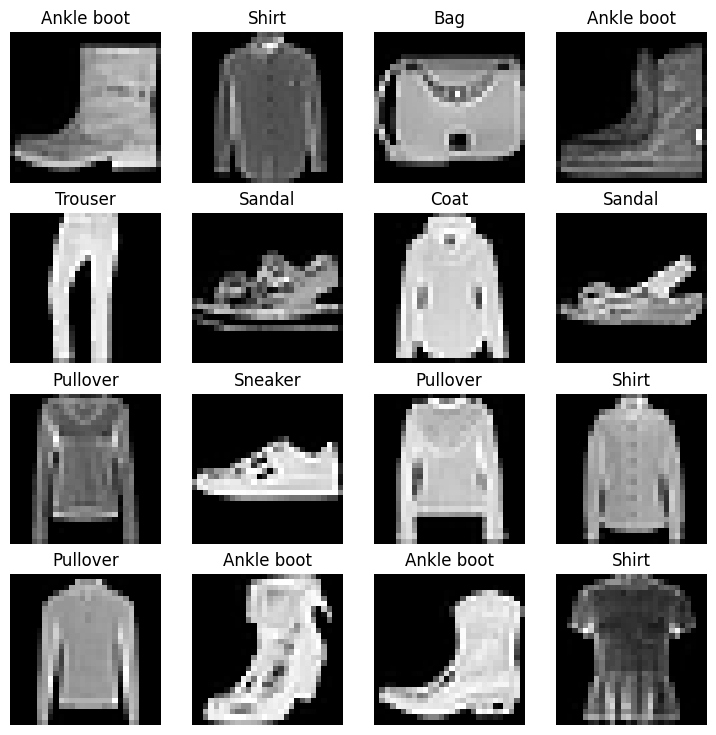

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

#### 2. Prepare the DataLoader

creata a dataloaders for out training set

In [ ]:
from torch.utils.data import DataLoader


In [ ]:
BATCH_SIZE = 32
train_dataloader = DataLoader(
    train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)

test_dataloader = DataLoader(
    test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)


In [ ]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e983c68cad0>, <torch.utils.data.dataloader.DataLoader object at 0x7e983c5df0d0>)


In [ ]:
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, Label size: torch.Size([])


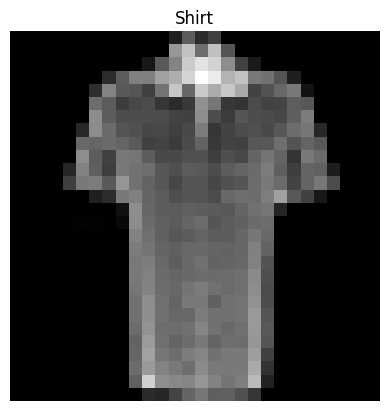

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, Label size: {label.shape}")

#### Model 0 : Building a Baseline Model

In [ ]:
flatten_model = nn.Flatten()
x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape Before Flattening: {x.shape} --> [colour_channels, height, width]\nShape After Flattening: {output.shape} --> [colour_channels, height*width]")

Shape Before Flattening: torch.Size([1, 28, 28]) --> [colour_channels, height, width]
Shape After Flattening: torch.Size([1, 784]) --> [colour_channels, height*width]


In [ ]:
print(x)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000,
          0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000,

In [ ]:
print(output)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2863, 0.0000, 0.0

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

##### 3.1 Setup loss, optimizer and evaluation metrics

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

##### 3.2 Creating a function to time our experiments

In [ ]:
from timeit import default_timer as Timer
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

##### 3.3 Creating a training loop and training a model on batcher of data

Let's step through it:
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

A fair few steps but...

...if in doubt, code it out.  
My Geniune Reponse: K BRO

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0, 0

  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:

      test_pred = model_0(X)

      test_loss += loss_fn(test_pred, y)

      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss:{train_loss:.5f} | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}% \n")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_on_cpu, end=train_time_end_on_cpu, device="cpu")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.59039 | Test Loss: 0.50954 | Test acc: 82.04% 

Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.47633 | Test Loss: 0.47989 | Test acc: 83.20% 

Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.45503 | Test Loss: 0.47664 | Test acc: 83.43% 

Train time on cpu: 31.705 seconds


#### 4.Make Predictions and get Model Results
 let's create a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X)

      loss += loss_fn(y_pred, y)

      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    #scale the loss and accuracy to find average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return { "model_name": model.__class__.__name__,
          "model_loss": loss.item(),
           "model_acc": acc

        }

model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_0_results




{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

#### 5.Setup Device Agnostic-code (for GPU)

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#### 6. Model 1 : Building a better model with non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784, hidden_units = 10, output_shape = len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

##### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

##### 6.2 Functionalising training and test loops


In [ ]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device):

  train_loss, train_acc = 0, 0
  model.to(device)

  for batch , (X, y) in enumerate(data_loader):
    X , y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train Loss:{train_loss:.5f} | Train Accuracy: {train_acc:.2f}%")

def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device):

  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test Loss:{test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")






In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n----------")
  train_step(data_loader = train_dataloader,
             model = model_1,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn)
  test_step(data_loader = test_dataloader,
            model = model_1,
            accuracy_fn = accuracy_fn,
            loss_fn = loss_fn)
  train_time_end_on_gpu = timer()
  total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
----------
Train Loss:1.09199 | Train Accuracy: 61.34%
Test Loss:0.95636 | Test Accuracy: 65.00%
Train time on cpu: 10.232 seconds
Epoch: 1 
----------
Train Loss:0.78101 | Train Accuracy: 71.93%
Test Loss:0.72227 | Test Accuracy: 73.91%
Train time on cpu: 21.042 seconds
Epoch: 2 
----------
Train Loss:0.67027 | Train Accuracy: 75.94%
Test Loss:0.68500 | Test Accuracy: 75.02%
Train time on cpu: 31.851 seconds


In [ ]:
torch.manual_seed(42)

model_1_results = eval_model(model=model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

The Above code should throw an error as the in eval_model, the tensors are not on the gpu, but since i have not activated the GPU it runs fine, but it must actually genreate an error


In [ ]:
#move values to the device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      loss += loss_fn(y_pred, y)

      acc+= accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {
            "model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc
  }



In [ ]:
model_1_results = eval_model(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

#### 7. Model 2: Building a Convolutional Neural Network(CNN)

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

To do so, we'll leverage the [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.


In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3 , padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    #print(x.shape)

    x = self.block_2(x)
    #print(x.shape)

    x = self.classifier(x)
    #print(x.shape)

    return x #here was the error, return X instead x lol



In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#SANITY CHECK
my_model_arch = """FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)"""
author_model_arch = """FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)"""

Exploring the Layers

In [ ]:
images = torch.rand(size= (32, 3, 64, 64)) #[batch, colour channel, height, weight]
test_image = images[0] # get a single image
print(f"Image batch shape: {images.shape}")
print(f"Image shape:{test_image.shape}")

Image batch shape: torch.Size([32, 3, 64, 64])
Image shape:torch.Size([3, 64, 64])


Let's create an example `nn.Conv2d()` with various parameters:
* `in_channels` (int) - Number of channels in the input image.
* `out_channels` (int) - Number of channels produced by the convolution.
* `kernel_size` (int or tuple) - Size of the convolving kernel/filter.
* `stride` (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
* `padding` (int, tuple, str) - Padding added to all four sides of input. Default: 0.

![example of going through the different parameters of a Conv2d layer](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*Example of what happens when you change the hyperparameters of a `nn.Conv2d()` layer.*

In [ ]:
torch.manual_seed(42)

conv_layer = nn.Conv2d( in_channels = 3,
                       out_channels = 10,
                        kernel_size = 3 ,
                        stride = 1,
                        padding=0) #can use "valid" or "same

print(f"Test image shape before conv : {test_image.shape}")
print(f"Test image shape after conv : {conv_layer(test_image).shape}")

Test image shape before conv : torch.Size([3, 64, 64])
Test image shape after conv : torch.Size([10, 62, 62])


Changing the conv Layer

In [ ]:
torch.manual_seed(42)

conv_layer_2 = nn.Conv2d( in_channels = 3,
                       out_channels = 10,
                        kernel_size = (5, 5),
                        padding = 0)

conv_layer_2(test_image.unsqueeze(dim=0)).shape, conv_layer(test_image).shape #(gives as a batch dim also, without squeeze and prev layer)

(torch.Size([1, 10, 60, 60]), torch.Size([10, 62, 62]))

For each out channel the shape is W = $R^{1 \times 60 \times 60} + $ bias $R^{1} (Scalar)$ I think lol. Yup this is wrong. This is the image i think


Or better yet lets check them out

In [ ]:
print(f"Conv_layer_2 weight shape:{conv_layer_2.weight.shape}")
print(f"Conv_layer_2 bias shape:{ conv_layer_2.bias.shape}")

Conv_layer_2 weight shape:torch.Size([10, 3, 5, 5])
Conv_layer_2 bias shape:torch.Size([10])


##### 7.2 Stepping through `nn.MaxPool2d()`

In [ ]:
print(f"Test image shape:{test_image.shape}")
print(f"Test image with unsqueezed dimensions : {test_image.unsqueeze(dim=0).shape}")


Test image shape:torch.Size([3, 64, 64])
Test image with unsqueezed dimensions : torch.Size([1, 3, 64, 64])


In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size = 2) # half the width and height

test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
test_image_through_conv.shape #also considers batch size

torch.Size([1, 10, 62, 62])

In [ ]:
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
test_image_through_conv_and_max_pool.shape

torch.Size([1, 10, 31, 31])

Notice the change in the shapes of what's happening in and out of a `nn.MaxPool2d()` layer.

The `kernel_size` of the `nn.MaxPool2d()` layer will affect the size of the output shape.

In our case, the shape halves from a `62x62` image to `31x31` image.



Let's see this work with a smaller tensor.

In [ ]:
torch.manual_seed(42)

random_tensor = torch.randn(size=[1, 1, 2, 2])
random_tensor.shape, random_tensor

(torch.Size([1, 1, 2, 2]),
 tensor([[[[0.3367, 0.1288],
           [0.2345, 0.2303]]]]))

In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size = 2 )
max_pool_layer(random_tensor).shape, max_pool_layer(random_tensor)

(torch.Size([1, 1, 1, 1]), tensor([[[[0.3367]]]]))

Exercise

In [ ]:
avg_layer = nn.AvgPool2d(kernel_size=2)
avg_layer(random_tensor)

tensor([[[[0.2326]]]])

In [ ]:
random_tensor.sum()/4

tensor(0.2326)

##### 7.3 Setup a loss function and optimizer for the model_2

We'll use the functions as before, `nn.CrossEntropyLoss()` as the loss function (since we're working with multi-class classification data).

And `torch.optim.SGD()` as the optimizer to optimize `model_2.parameters()` with a learning rate of `0.

In [ ]:
#Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr = 0.1)

##### 7.5 Training and testing model_2 using our training and test fucntions

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):

        #print("FLAG 1 ")
        #print(X.shape, y.shape)

        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)
        #print("FLAG 2 ") model was returning wrong x lol
        #print(y_pred.shape)

        # 2. Calculate loss

        loss = loss_fn(y_pred, y)

        #print("FLAG 3 ")
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as Timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 2.30229 | Train accuracy: 10.00%
Test loss: 2.30231 | Test accuracy: 9.99%

Epoch: 1
---------
Train loss: 2.30228 | Train accuracy: 10.00%
Test loss: 2.30231 | Test accuracy: 9.99%

Epoch: 2
---------
Train loss: 2.30228 | Train accuracy: 10.00%
Test loss: 2.30231 | Test accuracy: 9.99%

Train time on cpu: 203.176 seconds


In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3023064136505127,
 'model_acc': 9.994009584664537}

#### 8. Compare model Train and test time


In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,2.302306,9.994010


In [ ]:
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,31.704755
1,FashionMNISTModelV1,0.685001,75.019968,31.850935
2,FashionMNISTModelV2,2.302306,9.994010,203.176290


Why is v2Model so bad, same architecure, i did sanity check also

In [ ]:
def make_predictions(model: torch.nn.Module, data:list, device:torch.device=device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      if len(sample.shape) == 3:
        sample = sample.unsqueeze(dim=0)
      sample = sample.to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) #pergorming soft max on the logits dimesions and not the batch dimesions

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)



In [ ]:
test_samples[0].shape

torch.Size([1, 28, 28])

In [ ]:
test_labels[0],class_names[test_labels[0]]

(5, 'Sandal')

In [ ]:
pred_probs = make_predictions(model=model_0, data=test_samples)

In [ ]:
pred_probs[0], pred_probs[0].shape,class_names[pred_probs[0].argmax()]

(tensor([4.4458e-08, 6.3134e-08, 3.4539e-08, 2.4900e-08, 2.0237e-08, 8.9550e-01,
         1.7275e-07, 1.6880e-03, 1.8719e-05, 1.0279e-01]),
 torch.Size([10]),
 'Sandal')

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes, test_labels

(tensor([5, 3, 7, 4, 3, 0, 4, 7, 1]), [5, 1, 7, 4, 3, 0, 4, 7, 1])

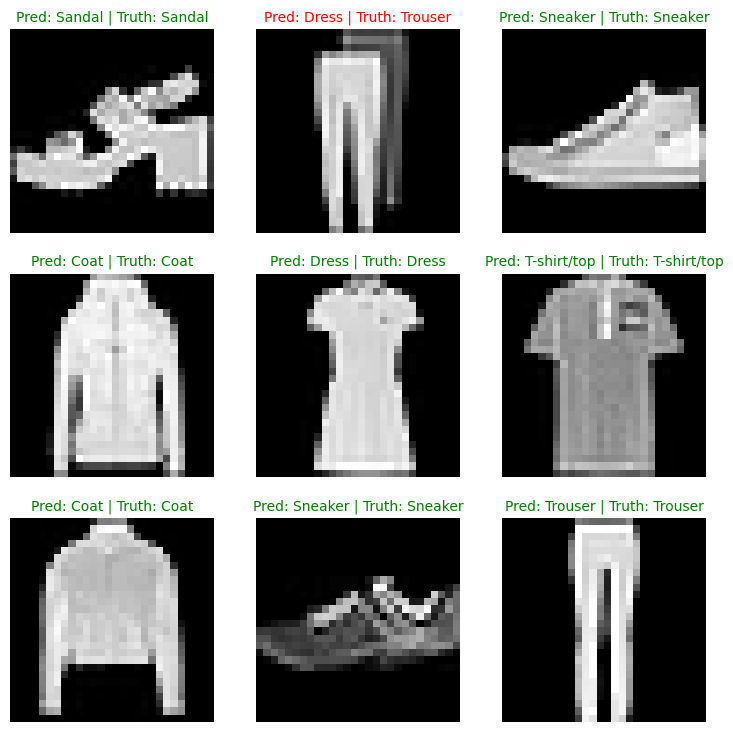

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

#### 10. Making a confusion Matrix for futher prediction evalution

Confuison matrix is used for classification

In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader):

    X, y = X.to(device), y.to(device)

    y_logit = model_2(X)

    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_preds_tensor = torch.cat(y_preds)

NameError: name 'model_0' is not defined

In [ ]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.4 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task = "multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

In [ ]:
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10, 7)
);

#### 11. Save and load best model

In [ ]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = ".."
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print("SAVING MODEL TO :",MODEL_SAVE_PATH)

torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH
        )

In [ ]:
loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

In [ ]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

In [ ]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

AttributeError: module 'IPython' has no attribute 'notebook'